# Примеры из вебинара


In [3]:
import pandas as pd

In [5]:
exchange_rate = pd.read_excel('usd_exchange_rate.xlsx')

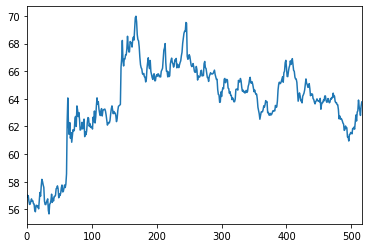

In [7]:
exchange_rate['curs_v_kopeykah'] = exchange_rate.curs*100
exchange_rate.curs.plot()

In [8]:
money = pd.read_excel('usd_exchange_rate.xlsx')

In [10]:
values = money.curs
past = 7*4
future = 7

start = past
end = len(values) - future
print(start, end)

28 510


In [14]:
raw_df = []
for i in range(start, end):
    past_and_future_values = values[(i-past):(i+future)]
    raw_df.append(list(past_and_future_values))

In [20]:
past_columns = [f"past_{i}" for i in range(past)]
future_columns = [f"future_{i}" for i in range(future)]

In [23]:
df = pd.DataFrame(raw_df, columns=(past_columns + future_columns))


In [24]:
df

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,57.0463,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,...,57.7701,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717
1,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,...,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742
2,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,...,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334
3,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,...,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616
4,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,...,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,63.7244,63.5788,63.5653,63.2257,62.5544,62.7686,62.5326,62.5831,62.5283,62.4071,...,61.8552,61.8343,61.9515,61.8031,62.3380,62.8299,62.3934,63.0359,63.1385,63.9091
478,63.5788,63.5653,63.2257,62.5544,62.7686,62.5326,62.5831,62.5283,62.4071,62.2499,...,61.8343,61.9515,61.8031,62.3380,62.8299,62.3934,63.0359,63.1385,63.9091,63.4342
479,63.5653,63.2257,62.5544,62.7686,62.5326,62.5831,62.5283,62.4071,62.2499,62.1673,...,61.9515,61.8031,62.3380,62.8299,62.3934,63.0359,63.1385,63.9091,63.4342,63.1742
480,63.2257,62.5544,62.7686,62.5326,62.5831,62.5283,62.4071,62.2499,62.1673,61.7164,...,61.8031,62.3380,62.8299,62.3934,63.0359,63.1385,63.9091,63.4342,63.1742,62.7977


In [25]:
X = df[past_columns][:-1]
y = df[future_columns][:-1]

In [47]:
X_test = df[past_columns][-1:]
y_test  = df[future_columns][-1:]

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression


In [34]:
LinReg = LinearRegression()

In [36]:
LinReg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
prediction = LinReg.predict(X_test)

In [38]:
prediction

array([[62.36062797, 62.29701491, 62.373335  , 62.45246181, 62.54925525,
        62.56018937, 62.74876367]])

In [40]:
import matplotlib.pyplot as plt

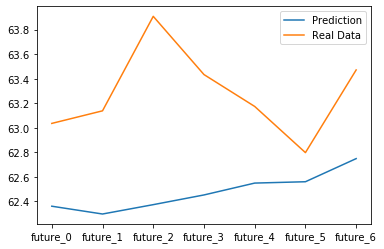

In [41]:
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.8028502890446175

# Neural Network

In [48]:
from sklearn.neural_network import MLPRegressor

In [169]:
MLP = MLPRegressor(max_iter=500, hidden_layer_sizes=(100,100,100), random_state=42)

In [170]:
MLP

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [171]:
MLP.fit(X,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [172]:
prediction = MLP.predict(X_test)

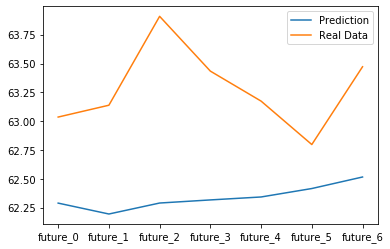

In [173]:
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()

In [174]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.9418338294094184

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
RFR = RandomForestRegressor(n_estimators=1000, max_depth=10)

In [83]:
RFR

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [84]:
RFR.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [85]:
prediction = RFR.predict(X_test)

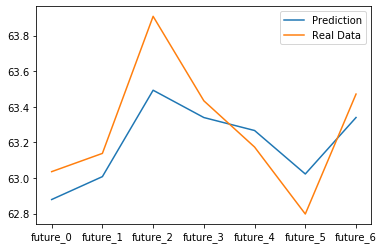

In [86]:
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()

In [87]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.17808925051347504

# KNRegression

In [88]:
from sklearn.neighbors import KNeighborsRegressor

In [98]:
KNR = KNeighborsRegressor(n_neighbors=2)

In [99]:
KNR

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

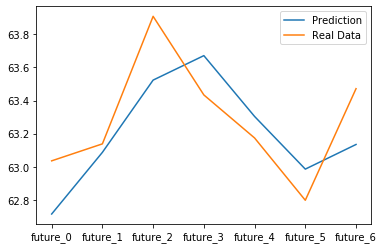

In [100]:
KNR.fit(X,y)
prediction = KNR.predict(X_test)
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()

In [101]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.2358142857142868

# Домашнее задание

1. https://scikit-learn.org/stable/modules/classes.html
2. Использовать тот же датасет 2018-JAN-10 — 2020-FEB-11
Ссылка на датасет: https://drive.google.com/file/d/1y84gbkIU5w17VEKCYQo_RFhRtArNubOI/view?usp=sharing
3. Улучшить результаты модели MLPRegressor, т.е. добиться ошибки меньше чем в эфире (1.5175)
Всегда использовать random_state=42 (там где это применимо)
4. Взять ТРИ других алгоритма регресси из Sklearn, и попробовать их обучить и добиться минимальной ошибки
5. Оформить ноутбук, с комментариями, графиками и выводами.
6. Сохранить в виде HTML (в Jupyter меню File->Download as -> Html)
Критерием оценки ДЗ НЕ является самая минимальна ошибка.

### Улучшение модели MLPRegressor

На данный момент мы имеем следующие настройки: MLP = MLPRegressor(max_iter=500, hidden_layer_sizes=(100,100,100), random_state=42)
Для того, чтобы улучшить показатели модели, можно проделать некотоыре манипуляции с данными, предаврительно изучив их и представив в более подходящем для модели виде.
Вторым способом является так называемый Hyperparameter tunig или тонкая настройка гиперпараметров.
У каждой модели имеется множество гиперпараметров с котоырми можно "играться". Чем более опытный дата-аналитик, тем проще ему будет подобную настройку. Взглянем ещё раз на гиперпараметры нашей модели.

In [103]:
MLP

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

Как мы видим, их довольно много. О каждом из них можно прочесть в документации. 
Для себя, как для новичка, после чтения документации и пары статей, я выделил следующие параметры:
* hidden_layer_sizes - количество нейронов в слое. Об этом кратко говорилось в вебинаре.
* activation - функция активации, которая определяет "выход" нейрона, т.е. по какому правилу будет определяться значение выхода
* learning_rate - некое правило обучения
* alpha - погрешность регрессии

Другие параметры тоже интересны, но большая часть из них работают при определенном наборе других параметров. 
Представленные параметры являются универсальными.

Мы могли бы перебрать вручную различные значения гиперпараметров. Но, оказывается, существуют специальыне инстурменты, которые
могут перебирать параметры в автоматическом режиме и выдавать опитмальные наборы параметров.
Есть два основных метода:
    * Grid Search - перебор всевозможных значений параметров из указываемых диапазонов
    * Rаndom Search - аналогично предыдущему, но перебор не всевозможных вариантов, а из случайного набора. (не уверен, что верно понял)
Мы остановимся на втором, потому что в первом случае при переборе всех параметров у меня на ноутбуке выдаётся ошибка переполнения. Результаты, в теории, должны быть близки.

In [122]:
from sklearn.model_selection import RandomizedSearchCV

In [191]:
hidden_layer_sizes = [(100, 100, 100), (50, 50, 50), (150, 150, 150), (200, 200, 200)]
activation = ['tanh', 'relu', 'identity', 'logistic']
learning_rate = ['constant', 'adaptive']
learning_rate_init = [0.0001, 0.001, 0.01]
alpha = [0.0001, 0.001, 0.01]
#early_stopping = ['True', 'False']

Перечислим гиперпараметры в виде набора значений параметров, котоыре мы хотим сравнить. 
Создадим словарь гиперпараметров и подсунем его в функцию поиска, указав дополнительно два параметра как количество итераций
и изначальное значение.

In [192]:
hyperparameters = dict(hidden_layer_sizes=hidden_layer_sizes, activation=activation, alpha=alpha, learning_rate=learning_rate, learning_rate_init=learning_rate_init)
rsearch = RandomizedSearchCV(MLP, hyperparameters, n_iter=15, random_state=42)
rsearch.fit(X, y)

C:\Users\tima\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\tima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\tima\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.m

C:\Users\tima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\tima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  

C:\Users\tima\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\tima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\tima\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.m

C:\Users\tima\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\tima\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\tima\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.m

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                          batch_size='auto', beta_1=0.9,
                                          beta_2=0.999, early_stopping=False,
                                          epsilon=1e-08,
                                          hidden_layer_sizes=(100, 100, 100),
                                          learning_rate='constant',
                                          learning_rate_init=0.001,
                                          max_iter=500, momentum=0.9,
                                          n_iter_no_change=10,
                                          nesterovs_momentum=True, power...
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'identity', 'logistic'],
                                        'alpha': [0.0001, 0.001, 0.01],
        

In [193]:
# выведем найденый лучший набор
print(rsearch.best_params_)

{'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (150, 150, 150), 'alpha': 0.001, 'activation': 'identity'}


1.047823437049726

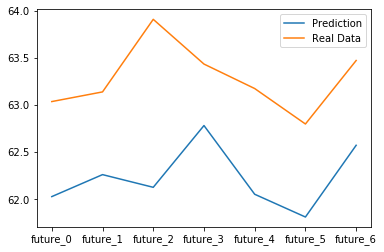

In [194]:
prediction = rsearch.predict(X_test)
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()
mean_absolute_error(prediction[0], y_test.iloc[0])

Результаты превосходят те. что были получены на вебинаре. Но не превосходят те, что я получил ранее самостоятельно. Видимо, повезло в первый раз.

## Выбор трёх других моделей

Нашёл замечательную блок-схему для выбора.
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
Реализуем LassoLARS, Ridge и KernelRidge

### LassoRegression

Есть два типа, простая и регрессией наисеньшего угла aka Lars. Как я понял, особой разницы нет.

In [213]:
from sklearn.linear_model import LassoLars

In [214]:
Lars = LassoLars()
Lars.fit(X,y)
Lars

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)

In [215]:
prediction = Lars.predict(X_test)

0.8721680201541194

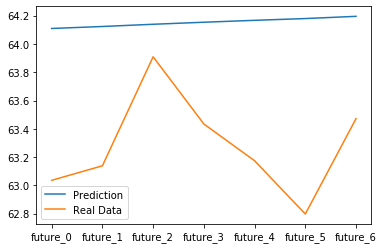

In [216]:
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()
mean_absolute_error(prediction[0], y_test.iloc[0])

### Ridge и KernelRidge

Линейная модель и её развитие. Чувствительны к регулированию параметра alpha

In [217]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X,y)
Ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

0.7985429532917274

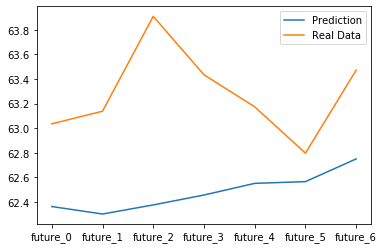

In [218]:
prediction = Ridge.predict(X_test)
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()
mean_absolute_error(prediction[0], y_test.iloc[0])

In [221]:
from sklearn.kernel_ridge import KernelRidge
KRidge = KernelRidge()
KRidge.fit(X,y)
KRidge

KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

0.9686487320272913

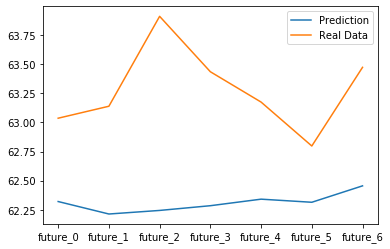

In [222]:
prediction = KRidge.predict(X_test)
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real Data")
plt.legend()
mean_absolute_error(prediction[0], y_test.iloc[0])

### Вывод

Были опробованы 7 различных моделей:

| Название модели       | Ошибка                |
| :------------- |:------------------|
| Linear Regression     | 0.8028   | 
| Neural Network*    | 1.5175 |   
| Neural Network with tuning  | 1.0478         | 
|Random Forest  | 0.1780         |
|KNRegression  | 0.2358         |
|LassoRegression | 0.8721         | 
|Ridge  | 0.7985         | 
|KernelRidge  | 0.9686         |

**данные взяты из вебинара*

Из рассмотренных моделей беспорными лидерами являются Random Forest и KNRegression. Это обсуловлено тем, это, в целом, очень точные модели, и, что гиперпараметры выставлял лектор - опытный дата-аналитик. Плохие результаты Neural Network можно объяснить как плохим тюнингом, так и тем, что данная модель не очень хорошо применима к нашей задаче. Из оставшихся моделей неплохо себя показала Ridge, но она была выполнена без настройки, поэтому её результаты далеки от лидеров.

Моделей великое множество, они классифицируются в зависимости от метода анализа, решающих функций итп. Выбор модели - отдельная наука. Модели выбираются в зависимости от класса задач, их сложности, количества и особенностей входных данных. Каждая модель имеет ряд гиперпараметров, регулированием которых возможно достижение лучших результатов. 
Но, имеется правило, что модель не следует излишне усложнять.

В выполнении домашнего задания и осознании, что вообще тут происходит очень помогла документация sklearn и следующие статьи:
* https://medium.com/@mandava807/cross-validation-and-hyperparameter-tuning-in-python-65cfb80ee485
* https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
* https://machinelearningmastery.com/how-to-improve-machine-learning-results/
* статьи на Википедии про искуственную нейронную сеть, оптимизацию гиперпараметров, выбор модели, перцептрон и функцию активации.